In [1]:
from tarea1.algoritmos import hola

hola()

hola


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# from matplotlib.pyplot import rcParams
# %matplotlib inline
# rcParams['font.family'] = 'serif'
# rcParams['font.size'] = 16

20:56 empieza a hablar de un ejercicio.

Obtener las derivadas para el método de gradiente.
Hay que armar el vector gradiente.

 
Sympy: Programación simbólica. Ecuaciones como objetos, puede ser complicado.

**Mejor hacer el gradiente a mano.**


# Gradiente con Backtracking Line Search 24:50

Alpha que es multiplicador de un compadre. Entre 0 y 0.5

Beta que actualiza tiempos. Entre 0 y 1 sin tocarlos. 

¿Tiempos o Steps? Tiempos. Siempre se refiere de esa manera.

Hay que crear una igualdad, se evalua. Siempre que se cumpla se actualiza el tiempo.

Se parte con el punto inicial 0 0 0

---
Delta X es - grad F. (26:24 )


Mientras no se cumpla la igualdad, se actualizará el punto inicial.
P0: (0,0,0)


## 28:43

Hay dos ciclos aniddados

1. Busqueda de la condición. La búsqueda del valor de t. T sub optimo para un sub problema
2. Con ese t, se actualiza el punto.

$$
P^{k+1} = P^K +t \nabla x
$$


## Criterio de parada
Hay varias, el ayudante ocupa una en que la norma del vector gradiente sea aproximadamente 0.
Osea, menor a un umbral.

$$
|| \nabla f(x) || \approx 0
$$


In [3]:
import random

def pointGenerator():
  return np.array([
    random.uniform(-10, 10),
    random.uniform(-20, 20),
  ])

def instanceGenerator():
  return np.array([
    pointGenerator() for sample in range(10)
  ])

instanceGenerator()

array([[  4.58062375,   1.54336444],
       [  0.53450891,   1.97000669],
       [ -6.94808862,  -8.16881081],
       [  0.07742529,  -2.2667546 ],
       [  3.54775306,  11.28049471],
       [ -5.41049051,  -2.06161132],
       [ -4.40337447, -19.54941314],
       [  4.99828234,  -8.60294317],
       [ -4.53676177,  -0.56228438],
       [ -1.18228584,   3.78232189]])

In [4]:
def f(X):
  x0 = X[0]
  x1 = X[1]
  x2 = X[2]
  return np.exp( -x0 + 2*x1 ) + np.exp( 3*x2 - 2*x0 ) + x1**2


def fd(X):
  x0 = X[0]
  x1 = X[1]
  x2 = X[2]

  return np.array([
    -np.exp(-x0 + 2*x1) - 2*np.exp( 3*x2 -2*x0 ),
    2*np.exp(-x0 + 2*x1) + 2*x1,
    3*np.exp(3*x2 - 2*x0)
  ])

In [5]:
epsilon = 0.001
alpha = 0.3
beta = 0.6

punto = np.array([0,0,0])

k = 0
t = 1

f_optima = []

while True:
  while True:
    LR = f(punto) + alpha*t * np.dot(np.transpose(fd(punto)), - fd(punto))
    LL = f(punto - t*fd(punto))
    t = t*beta

    if LR>LL:
      punto = punto - t*fd(punto)
      t = 1
      break
  

  if np.abs(np.linalg.norm(fd(punto))) <= epsilon:
    break

  f_optima.append(f(punto))
  k = k+1

print(f(punto), k)

0.0010009009786624175 1676


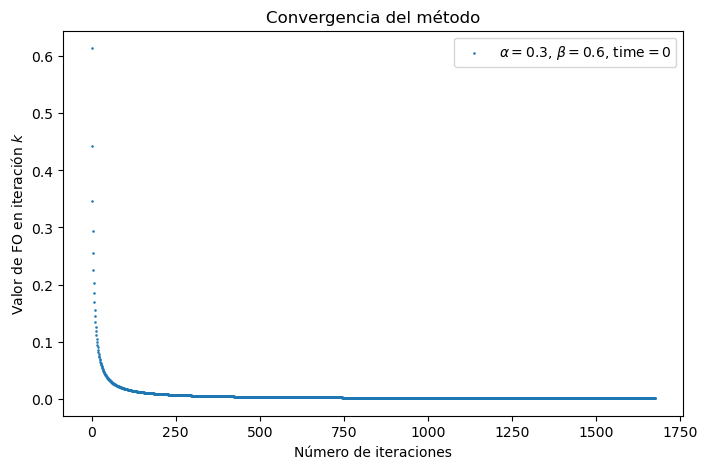

In [6]:
fig, (ax1) = plt.subplots(nrows=1, figsize=(8,5))

time=0
label= rf'$\alpha = {alpha}$, $\beta = {beta}$, time$= {time}$'

ax1.scatter(range(k), f_optima, s=0.7, label=label)
ax1.set_xlabel("Número de iteraciones")
ax1.set_ylabel("Valor de FO en iteración $k$")
ax1.set_title("Convergencia del método")
ax1.legend(loc="best")
